# 🧠 Pixels2Patterns: A Hands-On Workshop on Convolutional Neural Networks  
### Organized by **NeuralHive**, PES University EC Campus  

---

## 📌 Introduction  
Welcome to **Pixels2Patterns**, a hands-on workshop crafted to provide a **solid foundation in Convolutional Neural Networks (CNNs)** — the core architecture powering modern **computer vision**.  

In this session, you will not only **learn the theory behind CNNs**, but also **implement and experiment** with them on a classic dataset, gaining practical, research-ready skills.  

---

## 🎯 Workshop Objectives  
By the end of this notebook, you will be able to:  
- **Build** and train a **vanilla CNN** from scratch on the **MNIST handwritten digits dataset** ✍️🔢  
- **Understand** the role of:  
  - Convolutional Layers  
  - Pooling Layers  
  - Fully Connected Layers  
  - Output Predictions  
- **Experiment** with hyperparameters and architecture to see how small changes affect performance.  

---

## 🧪 Your Interactive Lab  
This notebook serves as your **guided lab environment**:  
- Follow along with the structured code examples.  
- Modify the architecture, layers, or training parameters.  
- Observe in real time how **pixels are transformed into patterns** that drive model intelligence.  

---

## 🚀 Why This Matters  
CNNs form the **backbone of image classification, object detection, and recognition systems** used across industries — from **healthcare** and **autonomous vehicles** to **space research** and **security systems**.  
This workshop equips you with the **core intuition and hands-on skills** to build upon, whether your next step is academic research or practical deployment.  

---

✨ **Let’s begin — where pixels evolve into patterns, and patterns into intelligence.**

# Setup & Imports

In this section, we prepare the **PyTorch environment** for our CNN on the MNIST dataset.  

We will:  
- Import all necessary **libraries** for building, training, and visualizing the model.  
- Set up **device configuration** to leverage GPU if available.  
- Ensure **reproducibility** with random seeds.  
- Define **helper functions** for visualizing MNIST images interactively.  

> This forms the foundation of our hands-on lab, ensuring everything is ready before we start building the CNN.

In [ ]:
# ========================================
#             Setup & Imports
# Pixels2Patterns Workshop | PyTorch MNIST CNN
# ========================================

import time  # For simulating step-by-step execution

# --- Step 1: Core Libraries ---
print("========================================")
print("STEP 1: Importing Core Libraries...")
import torch                             # PyTorch core: tensors, autograd, etc.
import torch.nn as nn                    # Neural network modules: layers like Conv, Linear
import torch.nn.functional as functions  # Activation functions like ReLU, Softmax
import torch.optim as optimizers         # Optimizers: algorithms to update weights during training
time.sleep(1)
print("Core libraries imported!\n")

# --- Step 2: Dataset Utilities ---
print("STEP 2: Importing Dataset Utilities...")
from torchvision import datasets, transforms   # Prebuilt datasets and image transformations
from torch.utils.data import DataLoader        # For batching and shuffling data
time.sleep(1)
print("Dataset utilities imported!\n")

# --- Step 3: Visualization ---
print("STEP 3: Importing Visualization Libraries...")
import matplotlib.pyplot as plt  # Plotting images, graphs, training curves
import numpy as np               # Array and numerical operations
time.sleep(1)
print("Visualization libraries imported!\n")

# --- Step 4: Device Setup ---
print("STEP 4: Setting up Device (CPU/GPU)...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Automatically use GPU if available
time.sleep(1)
print(f"Device available: '{device}'!\n")

# --- Step 5: Reproducibility ---
print("STEP 5: Setting random seeds for reproducibility...")
torch.manual_seed(42)                    # Fix random seed for CPU
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)          # Fix random seed for GPU
time.sleep(1)
print("Random seeds set!\n")

# --- Step 6: Helper Function ---
print("STEP 6: Defining helper function to visualize images...")

def show_images(images, labels, n=6):
    """
    Display the first 'n' images from a batch along with their labels.
    Useful for quickly visualizing MNIST samples.
    """
    images = images[:n]    # Take only first n images
    labels = labels[:n]    # Corresponding labels

    plt.figure(figsize=(12, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # MNIST images are grayscale
        plt.title(f"Label: {labels[i].item()}")       # Show true label
        plt.axis('off')                               # Hide axes for clarity
    plt.show()

time.sleep(1)
print("Helper function 'show_images' ready!\n")

print("Setup & Imports Complete. Ready to load the MNIST dataset! ✅")
print("========================================")

STEP 1: Importing Core Libraries...
Core libraries imported!

STEP 2: Importing Dataset Utilities...
Dataset utilities imported!

STEP 3: Importing Visualization Libraries...
Visualization libraries imported!

STEP 4: Setting up Device (CPU/GPU)...
Device available: 'cuda'!

STEP 5: Setting random seeds for reproducibility...
Random seeds set!

STEP 6: Defining helper function to visualize images...
Helper function 'show_images' ready!

Setup & Imports Complete. Ready to load the MNIST dataset! ✅


STEP 1: Defining Transformations for MNIST...
Transformations defined.

STEP 2: Loading MNIST Dataset...


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.64MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.1MB/s]


Training samples: 60000, Test samples: 10000

STEP 3: Creating DataLoaders for batching...
DataLoaders ready.

STEP 4: Defining helper function to visualize images...
Helper function 'show_images' ready.

STEP 5: Displaying a few training samples to explore the dataset...


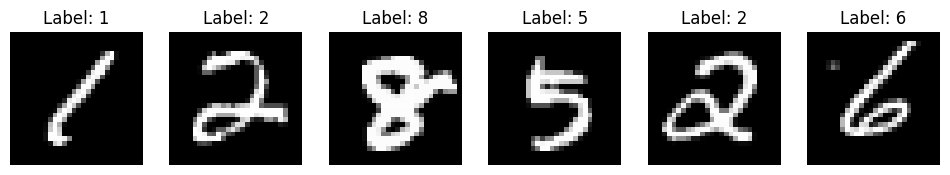

Sample images displayed. Dataset overview complete.



In [ ]:
# ========================================
#    Dataset Loading & Visualization
# Pixels2Patterns Workshop | PyTorch MNIST CNN
# ========================================

import time  # For simulating step-by-step execution

print("========================================")
print("STEP 1: Defining Transformations for MNIST...")
# --- Transform: convert images to tensors and normalize pixel values ---
# MNIST images are 28x28 grayscale images with pixel values 0-255.
# transforms.ToTensor() converts them to [0,1] float tensors.
transform = transforms.Compose([
    transforms.ToTensor()
])
time.sleep(1)
print("Transformations defined.\n")

print("STEP 2: Loading MNIST Dataset...")
# --- Load MNIST training and test datasets ---
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
time.sleep(1)
print(f"Training samples: {len(train_dataset)}, Test samples: {len(test_dataset)}\n")

print("STEP 3: Creating DataLoaders for batching...")
# --- DataLoader: batching and shuffling ---
# Batch size = 64 means we process 64 images at a time.
# shuffle=True ensures training data is randomly ordered for each epoch.
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)
time.sleep(1)
print("DataLoaders ready.\n")

print("STEP 4: Defining helper function to visualize images...")
def show_images(images, labels, n=6):
    """
    Display the first 'n' images from a batch along with their labels.
    Helps in understanding what the model will see during training.
    """
    images = images[:n]
    labels = labels[:n]

    plt.figure(figsize=(12, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # MNIST images are grayscale
        plt.title(f"Label: {labels[i].item()}")       # Show the true label
        plt.axis('off')
    plt.show()

time.sleep(1)
print("Helper function 'show_images' ready.\n")

print("STEP 5: Displaying a few training samples to explore the dataset...")
# --- Take one batch of training images and visualize ---
examples = next(iter(train_loader))
images, labels = examples
show_images(images, labels)
time.sleep(1)
print("Sample images displayed. Dataset overview complete.")
print("========================================\n")


# CNNModel Architecture (Sequential Style)

In this section, we define a **Convolutional Neural Network using `nn.Sequential`**, which simplifies stacking layers and makes the forward pass clean and readable.

---

### **Architecture Overview**

1. **Convolutional Layers**
   - **Conv1:** 1 input channel → 32 output channels, 3x3 kernel, stride=1, padding=1  
     Learns **basic edges** from grayscale images.
   - **Conv2:** 32 → 64 channels, 2x2 kernel, stride=2, padding=2  
     Reduces spatial size roughly by half and learns **higher-level patterns**.
   - **Conv3:** 64 → 64 channels, 2x2 kernel, stride=1, padding=1  
     Further extracts features before pooling.  
   - **ReLU activations** after each conv layer introduce **non-linearity**.

2. **Pooling**
   - **MaxPool2d(2,2):** Reduces width and height by 2, keeping the most important features.

3. **Flattening**
   - Converts 3D feature maps into a 1D vector for the fully connected layers.

4. **Fully Connected Layers**
   - **Linear(4096 → 1024) + ReLU:** Combines features into higher-level representations.
   - **Linear(1024 → 10):** Output layer representing **digits 0–9**.

5. **Output**
   - Produces **logits** for each class.  
   - Softmax is applied internally by `CrossEntropyLoss` during training.

---

### **Playground / Experiments**
- Change **number of filters** (e.g., Conv1: 32 → 64)  
- Modify **kernel sizes** (e.g., 3x3 → 5x5) or **strides**  
- Adjust **fully connected layer sizes** (e.g., 4096 → 2048)  
- Add **Dropout layers** to reduce overfitting  
- Visualize **feature maps** after convolutional layers to see what the network is learning  

---

✅ This architecture is slightly deeper than our basic CNN and is designed to **learn MNIST digits efficiently** while giving students opportunities to experiment and explore.


In [ ]:
# ========================================
#          CNNModel Architecture
# ========================================

import torch.nn as nn
import torch.nn.functional as F

print("STEP 1: Defining CNNModel using nn.Sequential...")

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Using nn.Sequential to stack layers
        self.stack = nn.Sequential(

            # --- Convolution Layer 1 ---
            # Input: 1 channel (grayscale), Output: 32 channels
            # Kernel: 3x3, stride=1, padding=1 keeps 28x28 size
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),  # Non-linearity

            # --- Convolution Layer 2 ---
            # Input: 32, Output: 64, Kernel: 2x2, stride=2, padding=2
            # Stride=2 reduces spatial size roughly by half
            nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=2),
            nn.ReLU(),

            # --- Convolution Layer 3 ---
            # Input: 64, Output: 64, Kernel: 2x2, stride=1, padding=1
            nn.Conv2d(64, 64, kernel_size=2, stride=1, padding=1),
            nn.ReLU(),

            # --- Max Pooling ---
            # Reduces width and height by factor of 2
            nn.MaxPool2d(2, 2),

            # --- Flatten ---
            nn.Flatten(),

            # --- Fully Connected Layers ---
            # First FC: 4096 → 1024 neurons, ReLU non-linearity
            nn.Linear(4096, 1024),
            nn.ReLU(),

            # Output layer: 1024 → 10 (digits 0-9)
            nn.Linear(1024, 10)
        )

    def forward(self, xb):
        # Forward pass through the stacked layers
        out = self.stack(xb)
        return out

# Instantiate model and move to GPU/CPU
model = CNNModel().to(device)
print("\nCNNModel defined successfully!")
print(model)

STEP 1: Defining CNNModel using nn.Sequential...

CNNModel defined successfully!
CNNModel(
  (stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2), padding=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=4096, out_features=1024, bias=True)
    (9): ReLU()
    (10): Linear(in_features=1024, out_features=10, bias=True)
  )
)


# Define Loss Function & Optimizer

In this section, we set up the **loss function** and **optimizer** required to train our `CNNModel`.

---

### **Loss Function**

- We use **CrossEntropyLoss** for multi-class classification (digits 0–9).  
- It combines **softmax** and **negative log-likelihood**, so we don’t need to apply softmax in the network.  
- Measures **how far the predicted logits are from the true labels**.

---

### **Optimizer**

- We use **Adam optimizer**, which adapts learning rates for each parameter automatically.  
- Optimizer updates network weights based on **gradients computed via backpropagation**.  

---

### **Playground / Experiments**

- Try different optimizers: `SGD`, `RMSprop`  
- Adjust learning rate (`lr`) to see faster or slower convergence  
- Experiment with **momentum** when using SGD  
- Observe **how loss decreases** with different settings  

---

✅ With the loss function and optimizer defined, our CNNModel is now ready for **training**.


In [ ]:
# ========================================
#    Define Loss Function & Optimizer
# ========================================

import torch.nn as nn
import torch.optim as optimizers  # Already imported earlier

print("STEP 2: Setting up Loss Function and Optimizer for CNNModel...")

# --- 1. Loss Function ---
# For multi-class classification (digits 0-9), CrossEntropyLoss is ideal.
# 🔹 Combines softmax + negative log-likelihood internally
criterion = nn.CrossEntropyLoss()
print("✅ Loss function: CrossEntropyLoss set successfully.")

# --- 2. Optimizer ---
# Adam is a popular optimizer that adapts learning rates for each parameter
learning_rate = 0.001
optimizer = optimizers.Adam(model.parameters(), lr=learning_rate)
print(f"✅ Optimizer: Adam with learning rate = {learning_rate} set successfully.")

# --- Optional experiments for students ---
# optimizer = optimizers.SGD(model.parameters(), lr=0.01, momentum=0.9)
# optimizer = optimizers.RMSprop(model.parameters(), lr=0.001)
# learning_rate = 0.005

print("\nLoss and Optimizer are ready. The CNNModel can now be trained!")

STEP 2: Setting up Loss Function and Optimizer for CNNModel...
✅ Loss function: CrossEntropyLoss set successfully.
✅ Optimizer: Adam with learning rate = 0.001 set successfully.

Loss and Optimizer are ready. The CNNModel can now be trained!


# Training Loop for CNNModel

In this section, we train our `CNNModel` on the MNIST dataset using the **defined loss function** and **optimizer**. The loop runs over multiple epochs, performing forward and backward passes, and updates the model's weights.

---

### **Step-by-Step Explanation**

1. **Hyperparameters**
   - `num_epochs`: Number of times the model sees the entire dataset.  
   - `batch_size`: Number of samples processed at once.  
   - `learning_rate`: Step size for optimizer updates.  

2. **Training Steps**
   - **Set model to training mode** with `model.train()`. Important for layers like Dropout or BatchNorm.  
   - **Forward pass**: Feed batch images to the model to get predictions.  
   - **Compute loss**: Compare predictions with true labels using `CrossEntropyLoss`.  
   - **Backward pass**: `loss.backward()` computes gradients for all parameters.  
   - **Update weights**: `optimizer.step()` applies the gradient updates.  
   - **Zero gradients**: `optimizer.zero_grad()` clears old gradients before the next step.  

3. **Logging**
   - Tracks **average loss per epoch**.  
   - Optional: log batch-level loss to observe learning dynamics.

---

### **Student Playground / Experiments**

- Change **num_epochs** to train longer or shorter.  
- Adjust **batch_size** to see impact on training speed and stability.  
- Modify **learning_rate** to observe faster or slower convergence.  
- Uncomment batch-level logging to watch **loss per batch**.  
- Experiment with **different optimizers** (SGD, RMSprop) and observe results.  

---

✅ This loop lets students **see the model learn over time**, providing a hands-on understanding of **forward pass, loss computation, backpropagation, and weight updates**.

In [ ]:
# ========================================
#       Training Loop for CNNModel
# ========================================

import time

# --- Hyperparameters ---
num_epochs = 10         # Try 5, 10, 20, etc.
batch_size = 64         # Try experimenting with 32, 128, etc.
learning_rate = 0.001   # Already set in optimizer; can tweak for faster/slower learning

# --- Load Data (if not already loaded) ---
# Using the same MNIST train_loader and test_loader from earlier

# --- Model, Loss, Optimizer (already defined) ---
# model -> CNNModel
# criterion -> CrossEntropyLoss
# optimizer -> Adam

print("🚀 Starting Training...\n")

# Track training loss per epoch
train_losses = []

for epoch in range(1, num_epochs + 1):
    epoch_loss = 0.0
    start_time = time.time()

    model.train()  # Set model to training mode

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()          # Reset gradients

        outputs = model(images)        # Forward pass
        loss = criterion(outputs, labels)  # Compute loss

        loss.backward()                # Backpropagation
        optimizer.step()               # Update weights

        epoch_loss += loss.item()

        # --- Optional: Print batch loss for debugging ---
        # if batch_idx % 100 == 0:
        #     print(f"Batch {batch_idx}, Loss: {loss.item():.4f}")

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)

    end_time = time.time()
    print(f"Epoch [{epoch}/{num_epochs}] - Loss: {avg_loss:.4f} - Time: {end_time - start_time:.1f}s")

print("\n✅ Training Complete!")

🚀 Starting Training...

Epoch [1/10] - Loss: 0.1558 - Time: 12.0s
Epoch [2/10] - Loss: 0.0419 - Time: 10.6s
Epoch [3/10] - Loss: 0.0260 - Time: 10.5s
Epoch [4/10] - Loss: 0.0174 - Time: 10.5s
Epoch [5/10] - Loss: 0.0128 - Time: 10.6s
Epoch [6/10] - Loss: 0.0119 - Time: 10.2s
Epoch [7/10] - Loss: 0.0087 - Time: 10.3s
Epoch [8/10] - Loss: 0.0083 - Time: 10.5s
Epoch [9/10] - Loss: 0.0065 - Time: 10.4s
Epoch [10/10] - Loss: 0.0057 - Time: 10.5s

✅ Training Complete!


# Model Evaluation on Test Set

In this section, we evaluate our trained `CNNModel` on the **MNIST test set** to measure its performance and visualize predictions.

---

### **Evaluation Steps**

1. **Set model to evaluation mode**  
   - `model.eval()` disables Dropout and BatchNorm updates to ensure consistent predictions.  

2. **Disable gradients**  
   - `torch.no_grad()` prevents gradient computation, saving memory and speeding up evaluation.  

3. **Compute Accuracy**  
   - Compare the predicted class with true labels.  
   - Accuracy = `(correct predictions / total samples) * 100`.  

4. **Visualize Sample Predictions**  
   - Display a few images along with **True labels (T)** and **Predicted labels (P)**.  
   - Students can adjust the number of samples displayed (`n`) to explore more results.  

---

### **Student Playground / Experiments**

- Display **misclassified images** to analyze where the model fails.  
- Compare **train vs test accuracy** to detect overfitting.  
- Experiment with **different architectures or hyperparameters** and observe changes in accuracy.  
- Track predictions after adding **Dropout, BatchNorm, or changing activation functions**.  

---

✅ This section lets students **quantitatively and visually assess** how well the CNNModel is performing on unseen data.
`

🔎 Evaluating CNNModel on Test Set...
✅ Test Accuracy: 99.00%



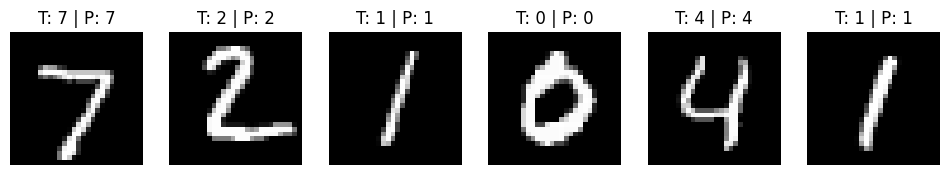

In [ ]:
# ========================================
#     Model Evaluation on Test Set
# ========================================

print("🔎 Evaluating CNNModel on Test Set...")

model.eval()  # Set model to evaluation mode (disables dropout, etc.)
correct = 0
total = 0

# Disable gradient computation for evaluation (saves memory & speeds up)
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)               # Forward pass
        _, predicted = torch.max(outputs, 1) # Get class with highest logit
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"✅ Test Accuracy: {accuracy:.2f}%\n")

# --- Display Sample Predictions ---
examples = iter(test_loader)
images, labels = next(examples)
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Move images to CPU for visualization
images = images.cpu()
labels = labels.cpu()
predicted = predicted.cpu()

# Display first 6 sample predictions
def show_predictions(images, labels, preds, n=6):
    plt.figure(figsize=(12, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"T: {labels[i].item()} | P: {preds[i].item()}")
        plt.axis('off')
    plt.show()

show_predictions(images, labels, predicted)

# Visualizations: Training Loss & Feature Maps

In this section, we visualize the **training process** and explore the **feature maps learned by the CNN**.

---

### **1. Training Loss Curve**

- Plots **training loss vs epochs**.  
- Helps students **see how the network converges over time**.  
- Playground ideas:
  - Change `num_epochs` to train longer or shorter.  
  - Adjust learning rate or optimizer and observe changes in the curve.  
  - Compare curves for different architectures.

---

### **2. Feature Map Visualization**

- Visualizes the **activations from convolutional layers**.  
- Each feature map shows **what patterns the network is detecting** in the input images.  
- Students can experiment with:
  - `layer_idx` to view different convolutional layers.  
  - `n_features` to display more or fewer feature maps.  
  - Input different digits to see how activations change.

---

### **Why it matters**

- Connects **theory (convolutions, activations)** with **what the network actually sees**.  
- Encourages students to **explore and understand CNN internals**, not just outputs.

---

✅ These visualizations make the notebook **interactive and exploratory**, allowing students to **see learning dynamics** and **inspect intermediate representations** in the network.

In [ ]:
# ========================================
# 8️⃣ Visualizations: Training Loss & Feature Maps
# ========================================

import matplotlib.pyplot as plt

# --- 1. Plot Training Loss Curve ---
plt.figure(figsize=(8,5))
plt.plot(train_losses, marker='o', color='blue')  # Plot loss recorded during training
plt.title("Training Loss over Epochs")            # Title of the plot
plt.xlabel("Epoch")                               # X-axis: epoch number
plt.ylabel("Loss")                                # Y-axis: loss value
plt.grid(True)                                    # Add grid for better readability
plt.show()                                        # Display the plot

# --- 2. Optional: Visualize Feature Maps from First Conv Layer ---
def visualize_feature_maps(model, images, layer_idx=0, n_features=6):
    """
    Visualizes the first 'n_features' feature maps from a given convolutional layer.

    Parameters:
    - model: trained CNN model
    - images: input images (batch) to pass through the network
    - layer_idx: index of the layer in model.stack to visualize
    - n_features: number of feature maps to display
    """

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for visualization
        x = images.to(device)  # Move input images to device (CPU/GPU)

        # Pass the input through layers sequentially up to the selected layer
        for i, layer in enumerate(model.stack):
            x = layer(x)
            if i == layer_idx:  # Stop at the desired layer
                break

        feature_maps = x.cpu()  # Move feature maps to CPU for plotting

        # Plot the first 'n_features' feature maps
        plt.figure(figsize=(12,2))
        for i in range(min(n_features, feature_maps.shape[1])):
            plt.subplot(1, n_features, i+1)
            plt.imshow(feature_maps[0,i,:,:], cmap='viridis')  # Visualize single feature map
            plt.title(f"Feature {i+1}")
            plt.axis('off')  # Hide axes for cleaner visualization
        plt.show()

# --- Example Usage ---
examples = iter(test_loader)
images, labels = next(examples)                 # Get a batch of test images
visualize_feature_maps(model, images, layer_idx=1, n_features=6)  # Visualize feature maps